In [11]:
import pickle
import numpy as np
import lzma
import scipy.signal
import tensortools as tt
import pickle
import matplotlib.pyplot as plt

import elephant.statistics as estats
import elephant
import neo
from quantities import ms, s, Hz

from elephant.spike_train_dissimilarity import victor_purpura_distance
from elephant.spike_train_dissimilarity import van_rossum_distance

import random
import seaborn as sns

def Get_param(NetworkType, n, model_id, input_idx):
    CellType = "point"
    with open('./params/' + str(NetworkType) + '_' + str(CellType) + '_layercount' + str(n) + '_model' + str(model_id) + '_input' + str(input_idx) + '_' + 'running_params.pkl', 'rb') as inp:
        loaded_data = pickle.load(inp)
    return loaded_data

def get_info(NetworkType, n, model_id, input_idx, index):
    paramload = Get_param(NetworkType, n, model_id,input_idx)
    parmamter = paramload[index]
    network_connmat = parmamter['network_connmat']
    input_sti = parmamter['stimulations']
    filename = parmamter['unique_id']
    print(filename)
    with lzma.open("./savedoutput/" + filename + ".xz", "rb") as fp:
        spiketimes = pickle.load(fp)
    return {'uid': filename, 'input':input_sti, 'output':spiketimes, 'matrix':network_connmat}

def get_index(md, sd, n):
    counter = 0
    for MeanDelay_noround in np.arange(2, 3.01, 0.2):
        MeanDelay = np.round(MeanDelay_noround,1)
        for stdDelay_noround in np.arange(0, 1.01, 0.05):
            stdDelay = np.round(stdDelay_noround,2)
            for n_run in np.arange(0, 10, 1):
                if (MeanDelay == md) & (stdDelay == sd) & (n_run == n):
                    return counter
                counter += 1
                
def get_vp(baseline, distrubed, qnum):
    # Calculating the victor purpora distace of a single cell spiking
    duration = 10000
    train1 = neo.SpikeTrain(baseline * ms, t_stop=duration*ms)
    train2 = neo.SpikeTrain(distrubed * ms, t_stop=duration*ms)
    
    # q = 1.0 / (10.0 * ms) # used in other paper
    q = qnum / ms # cost factor for shifting spikes in the victor purpura distance
    vp_dist = victor_purpura_distance([train1, train2], q)[0, 1]
    
    
    if len(baseline) == 0:
        return 0
    return vp_dist/ len(baseline)

def get_vr(baseline, distrubed, taunum):
    # Calculating the van rossum distace of a single cell spiking
    duration = 10000
    train1 = neo.SpikeTrain(baseline * ms, t_stop=duration*ms)
    train2 = neo.SpikeTrain(distrubed * ms, t_stop=duration*ms)
  
    # tau = 1s default? 10ms   why 10ms, vab rissom paper
    # tau = 10.0 * ms # time constant for the van rossum distance
    tau = 1000 * taunum * ms
    vr_dist = van_rossum_distance([train1, train2], tau)[0, 1]
    
    if len(baseline) == 0:
        return 0
    return vr_dist/ len(baseline)
                

In [2]:

outdata = get_info('FeedForward', 30, 5,5,get_index(2.0, 0.0, 0))

FeedForward_point_layercount30_model5_input5_stddelay0.0_meandelay2.0_nrun0


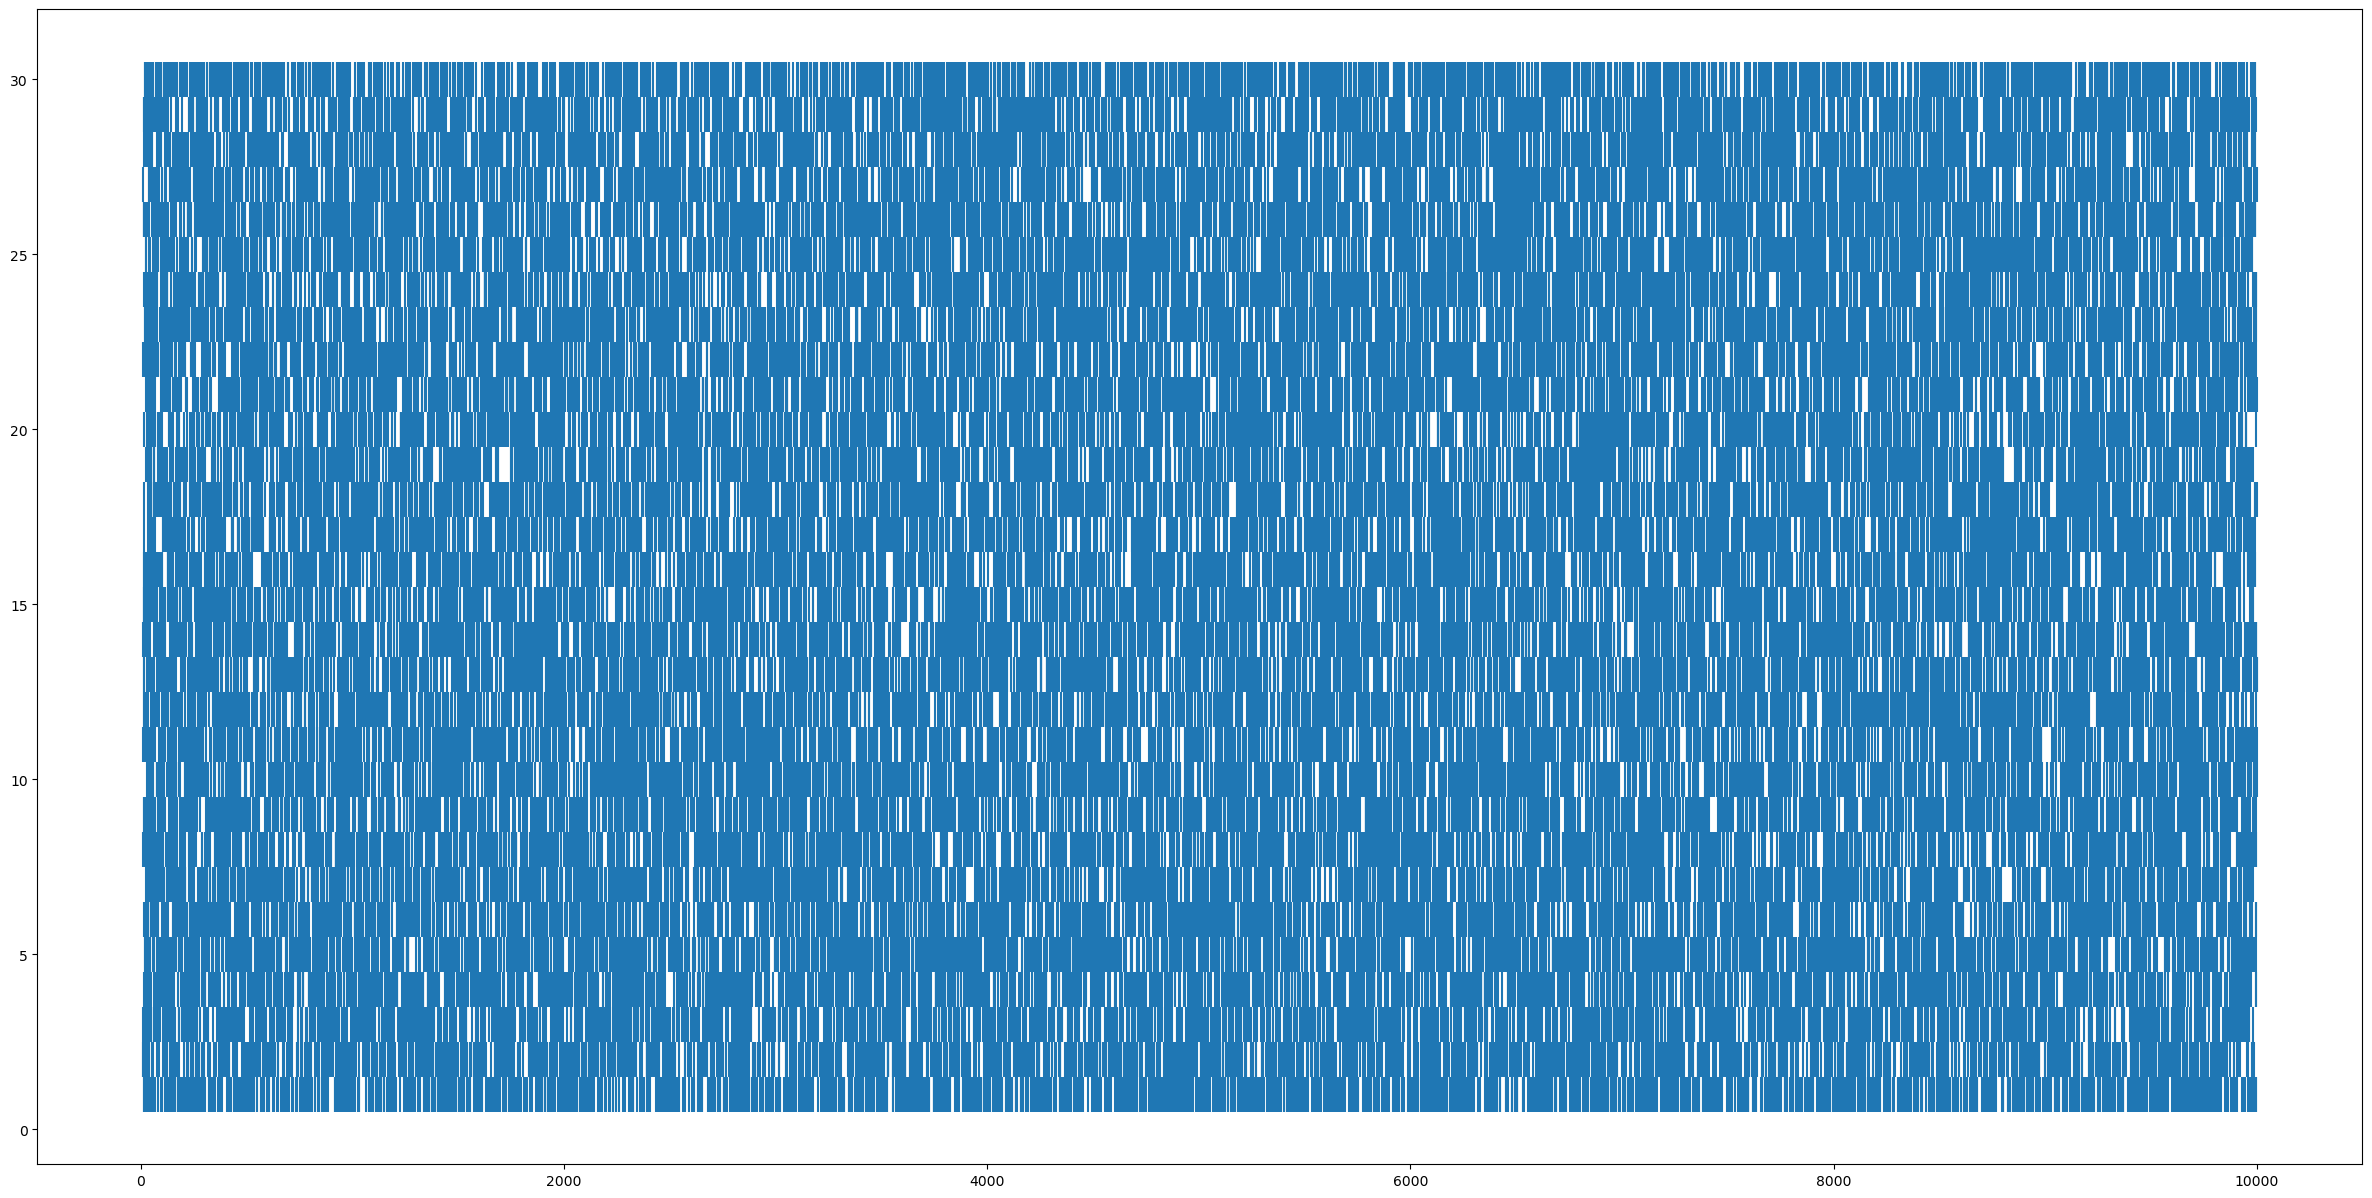

In [3]:
plt.figure(figsize=(30, 15))
for i in range(len(outdata['input'])):
    if len(outdata['input'][i]) > 0:
        plt.vlines(outdata['input'][i], i + 0.5, i + 1.5)
plt.show()

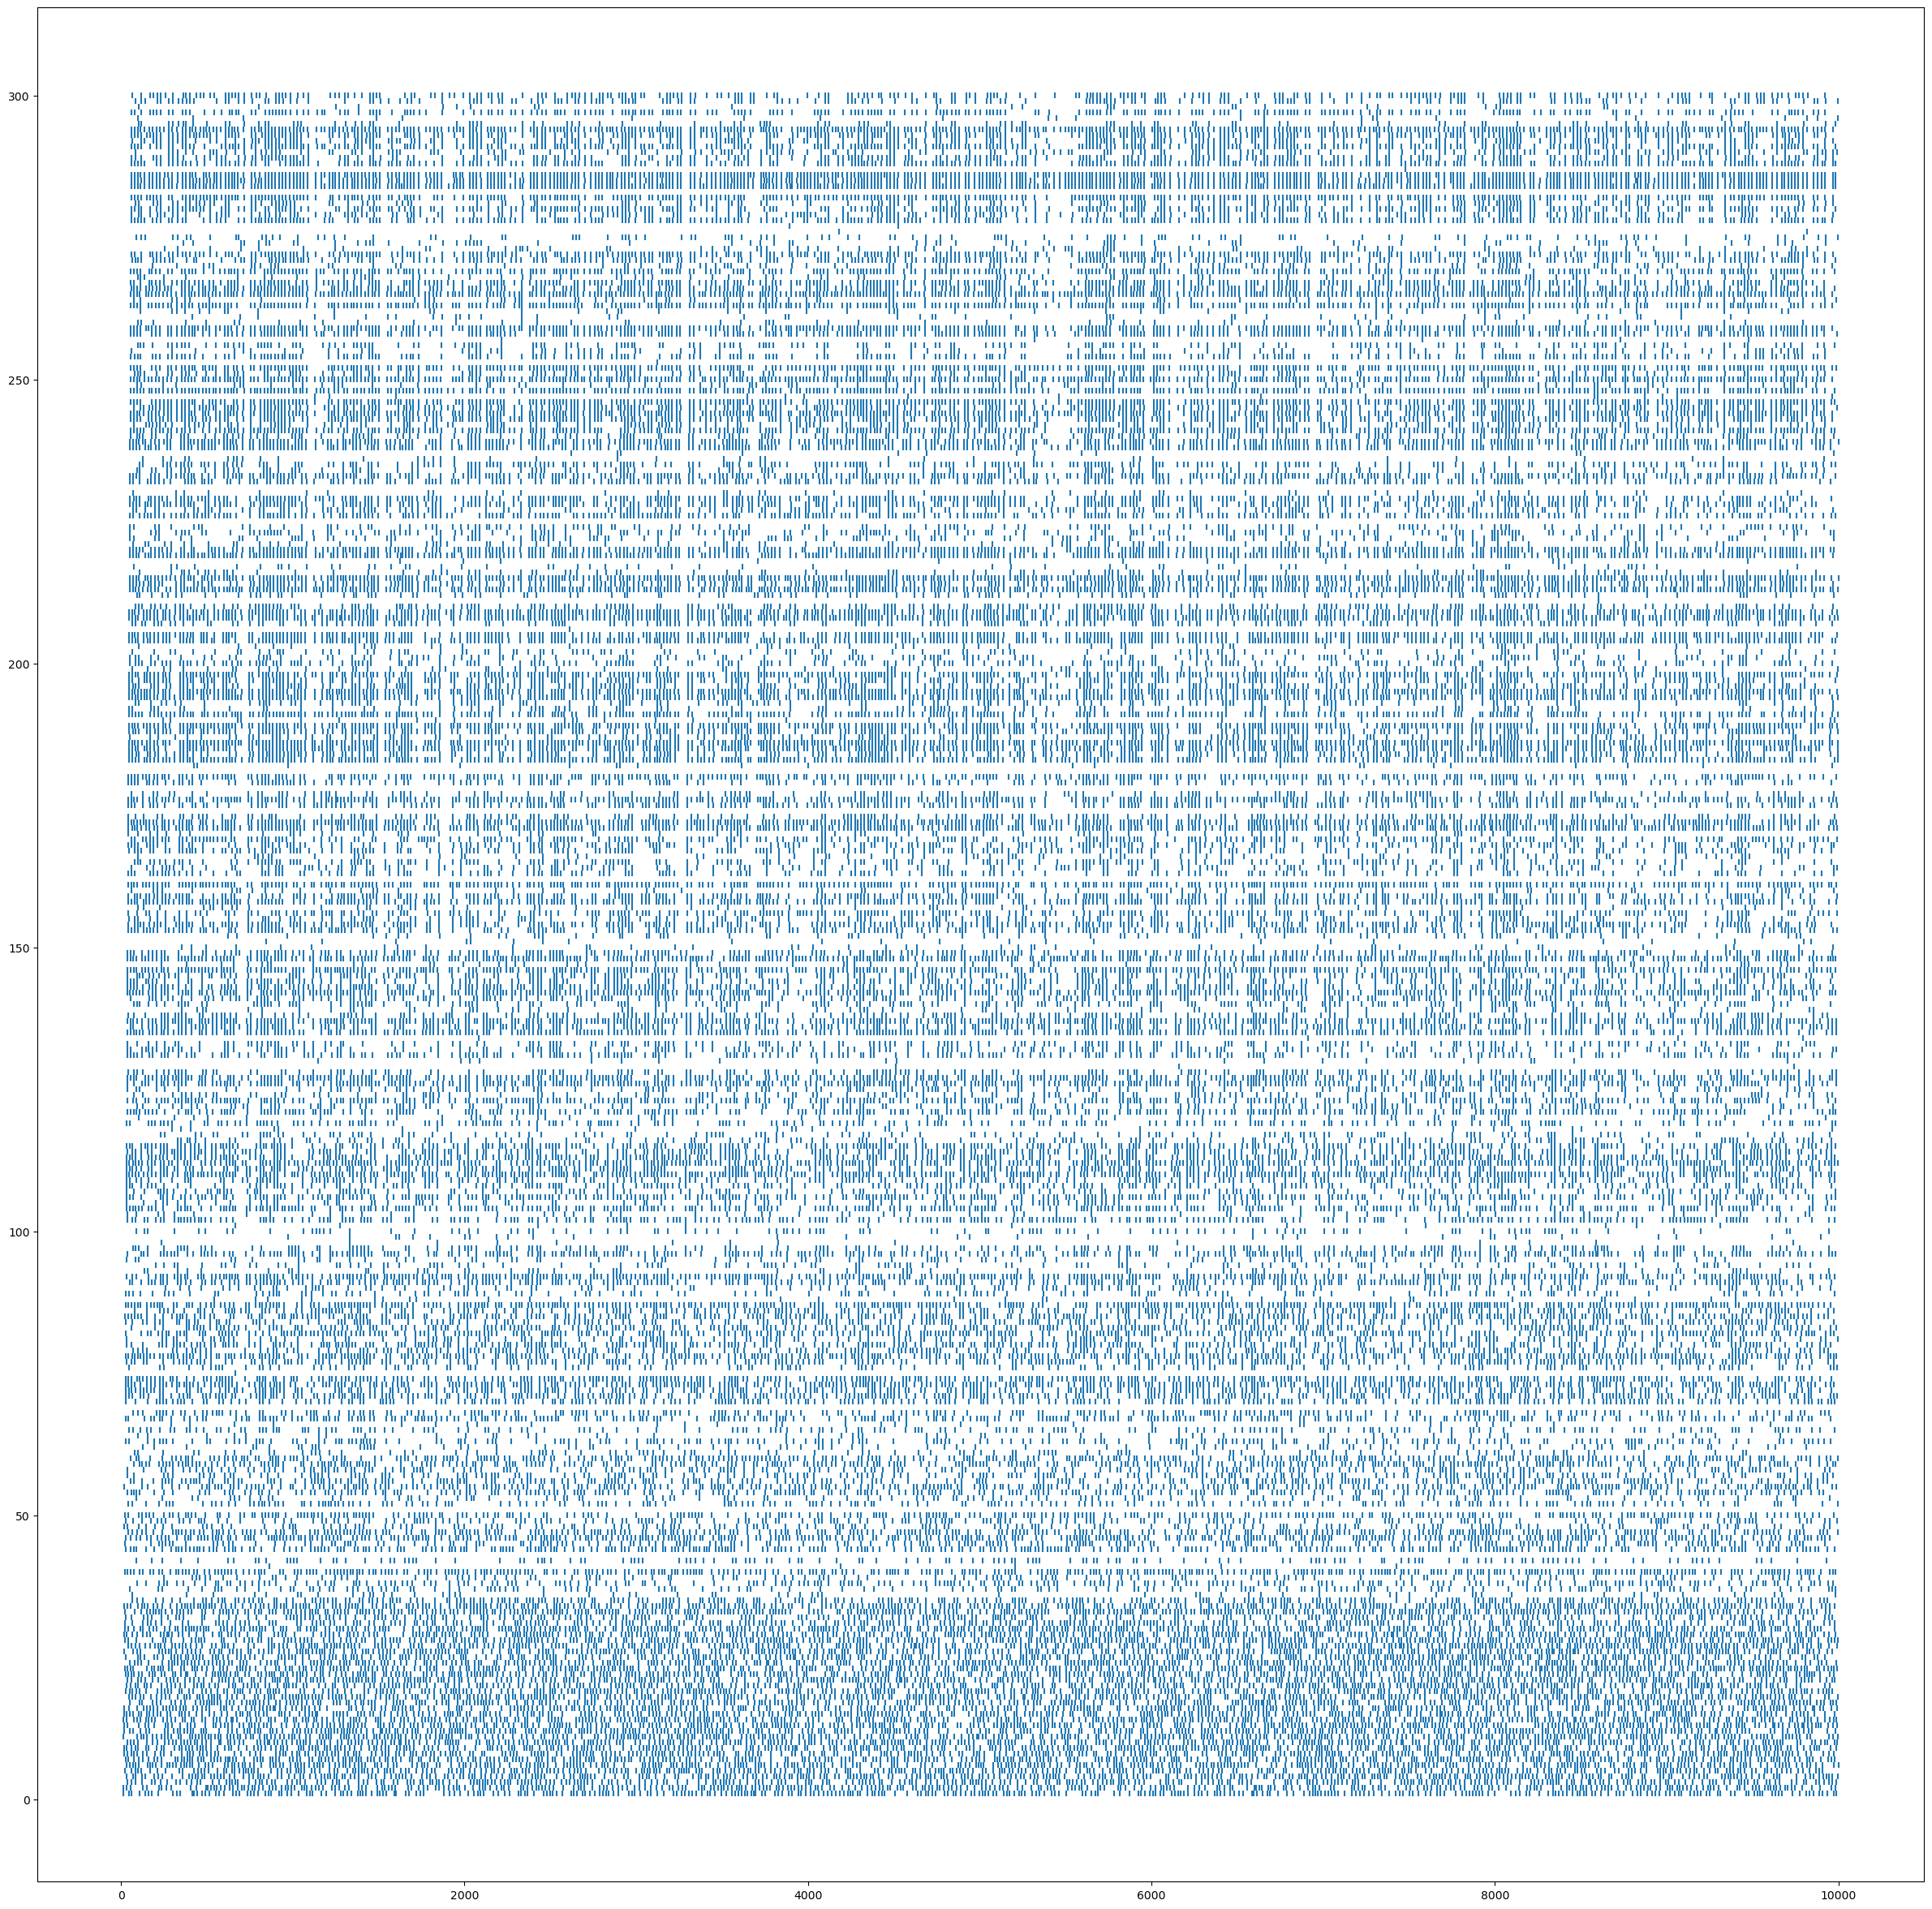

In [5]:
plt.figure(figsize=(30, 30))
for i in range(len(outdata['output'])):
    if len(outdata['output'][i]) > 0:
        plt.vlines(outdata['output'][i], i + 0.5, i + 1.5)
plt.show()

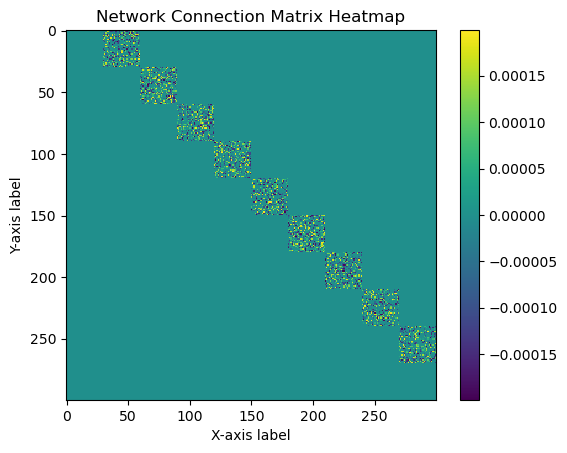

In [6]:
plt.imshow(outdata['matrix'], cmap='viridis', interpolation='nearest')
plt.colorbar()  
plt.title('Network Connection Matrix Heatmap')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.show()

In [7]:

outdata = get_info('SmallWorld', 60, 5,5,get_index(2.0, 0.0, 0))

SmallWorld_point_layercount60_model5_input5_stddelay0.0_meandelay2.0_nrun0


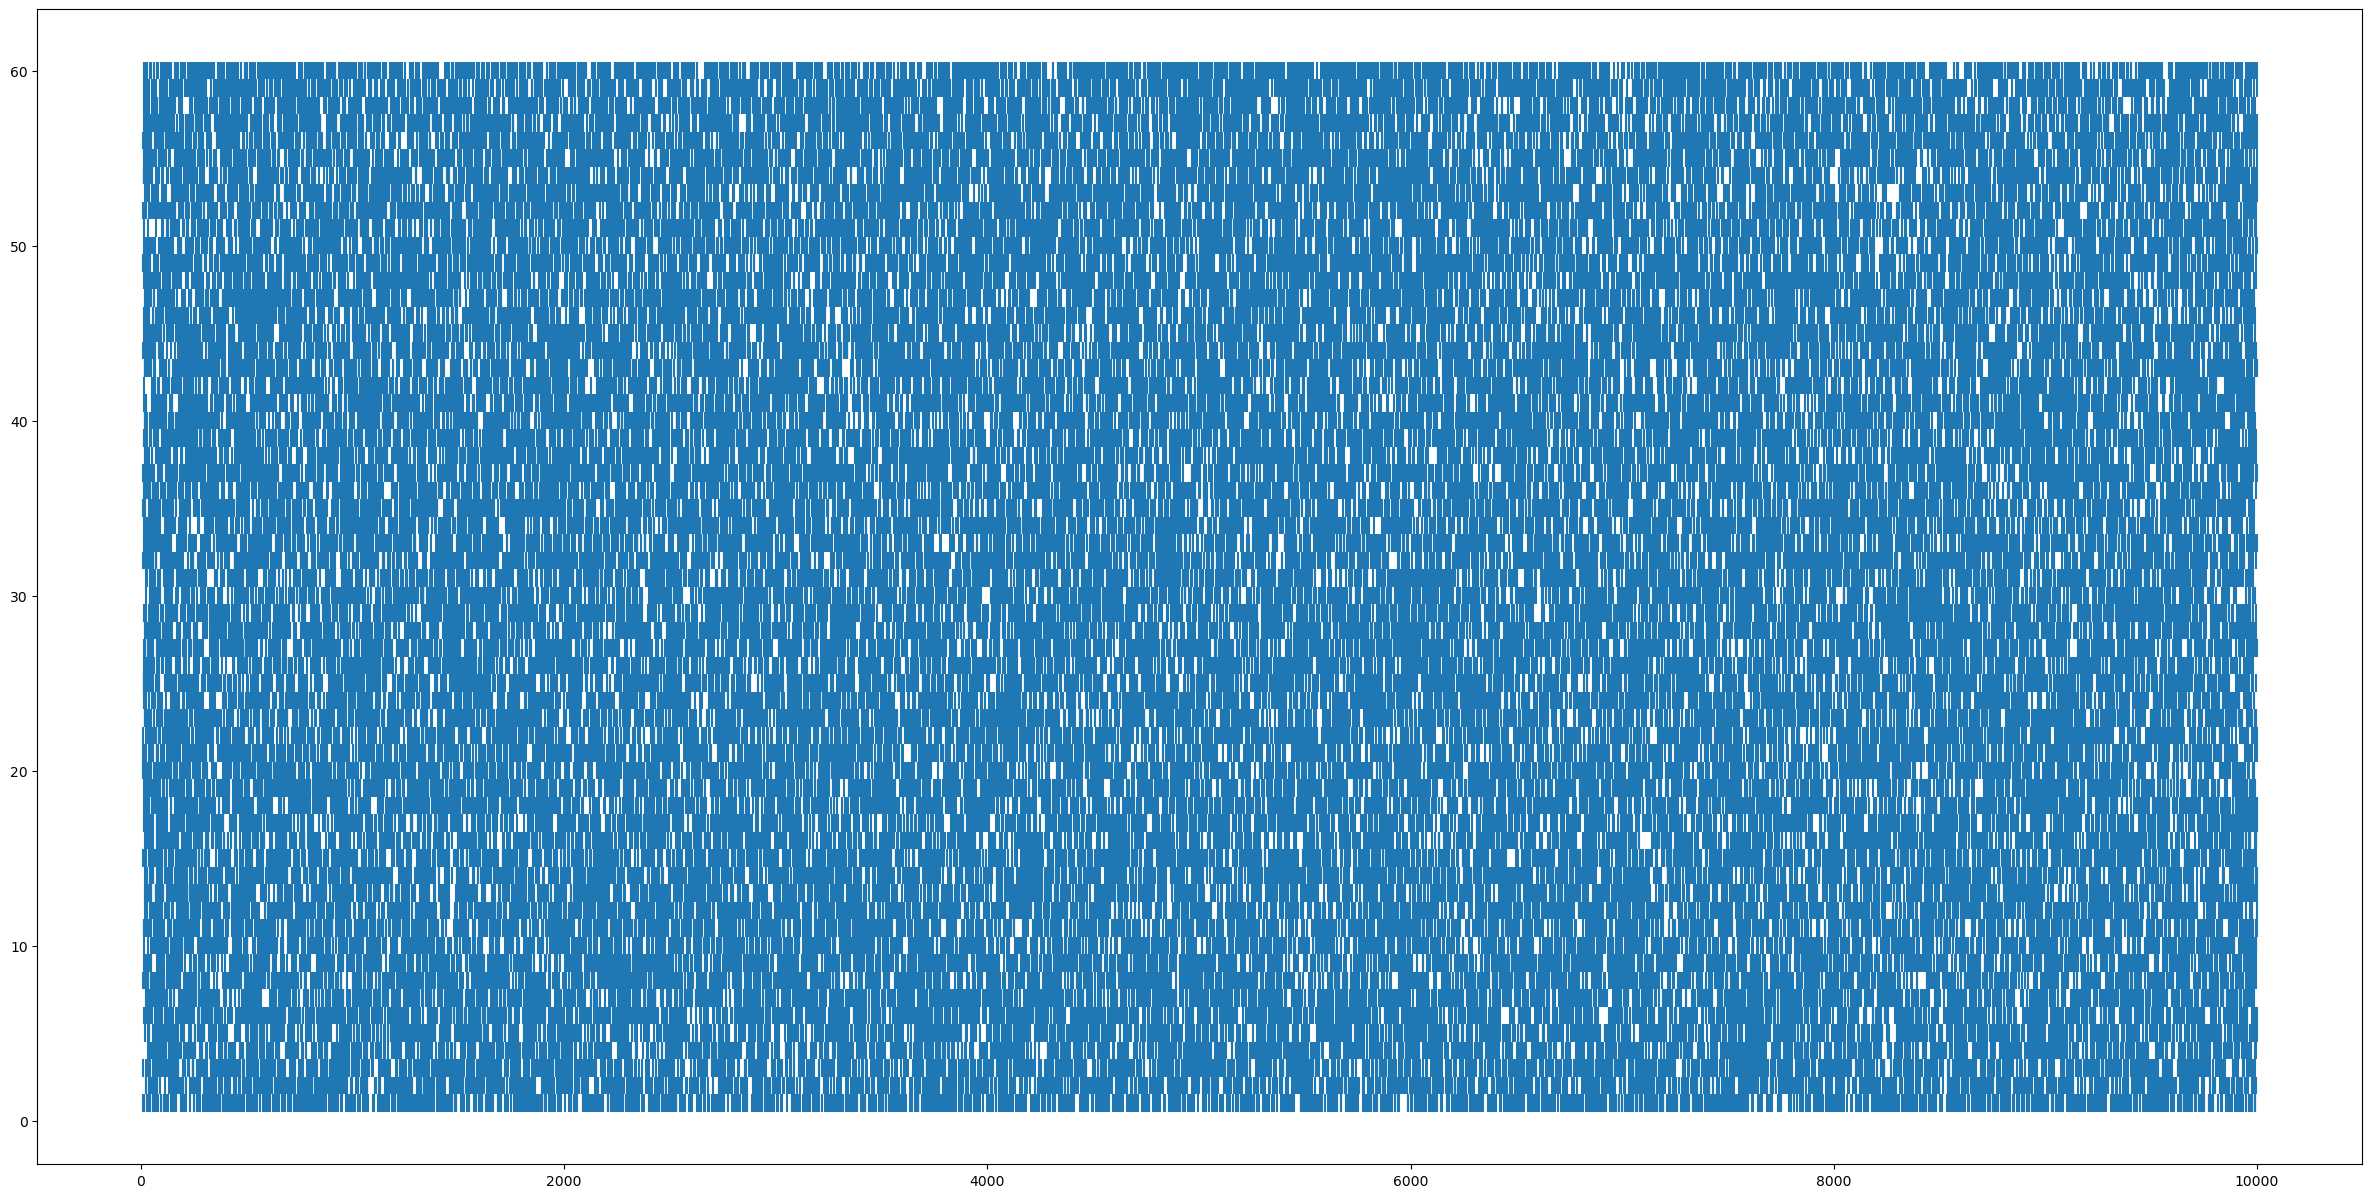

In [8]:
plt.figure(figsize=(30, 15))
for i in range(len(outdata['input'])):
    if len(outdata['input'][i]) > 0:
        plt.vlines(outdata['input'][i], i + 0.5, i + 1.5)
plt.show()

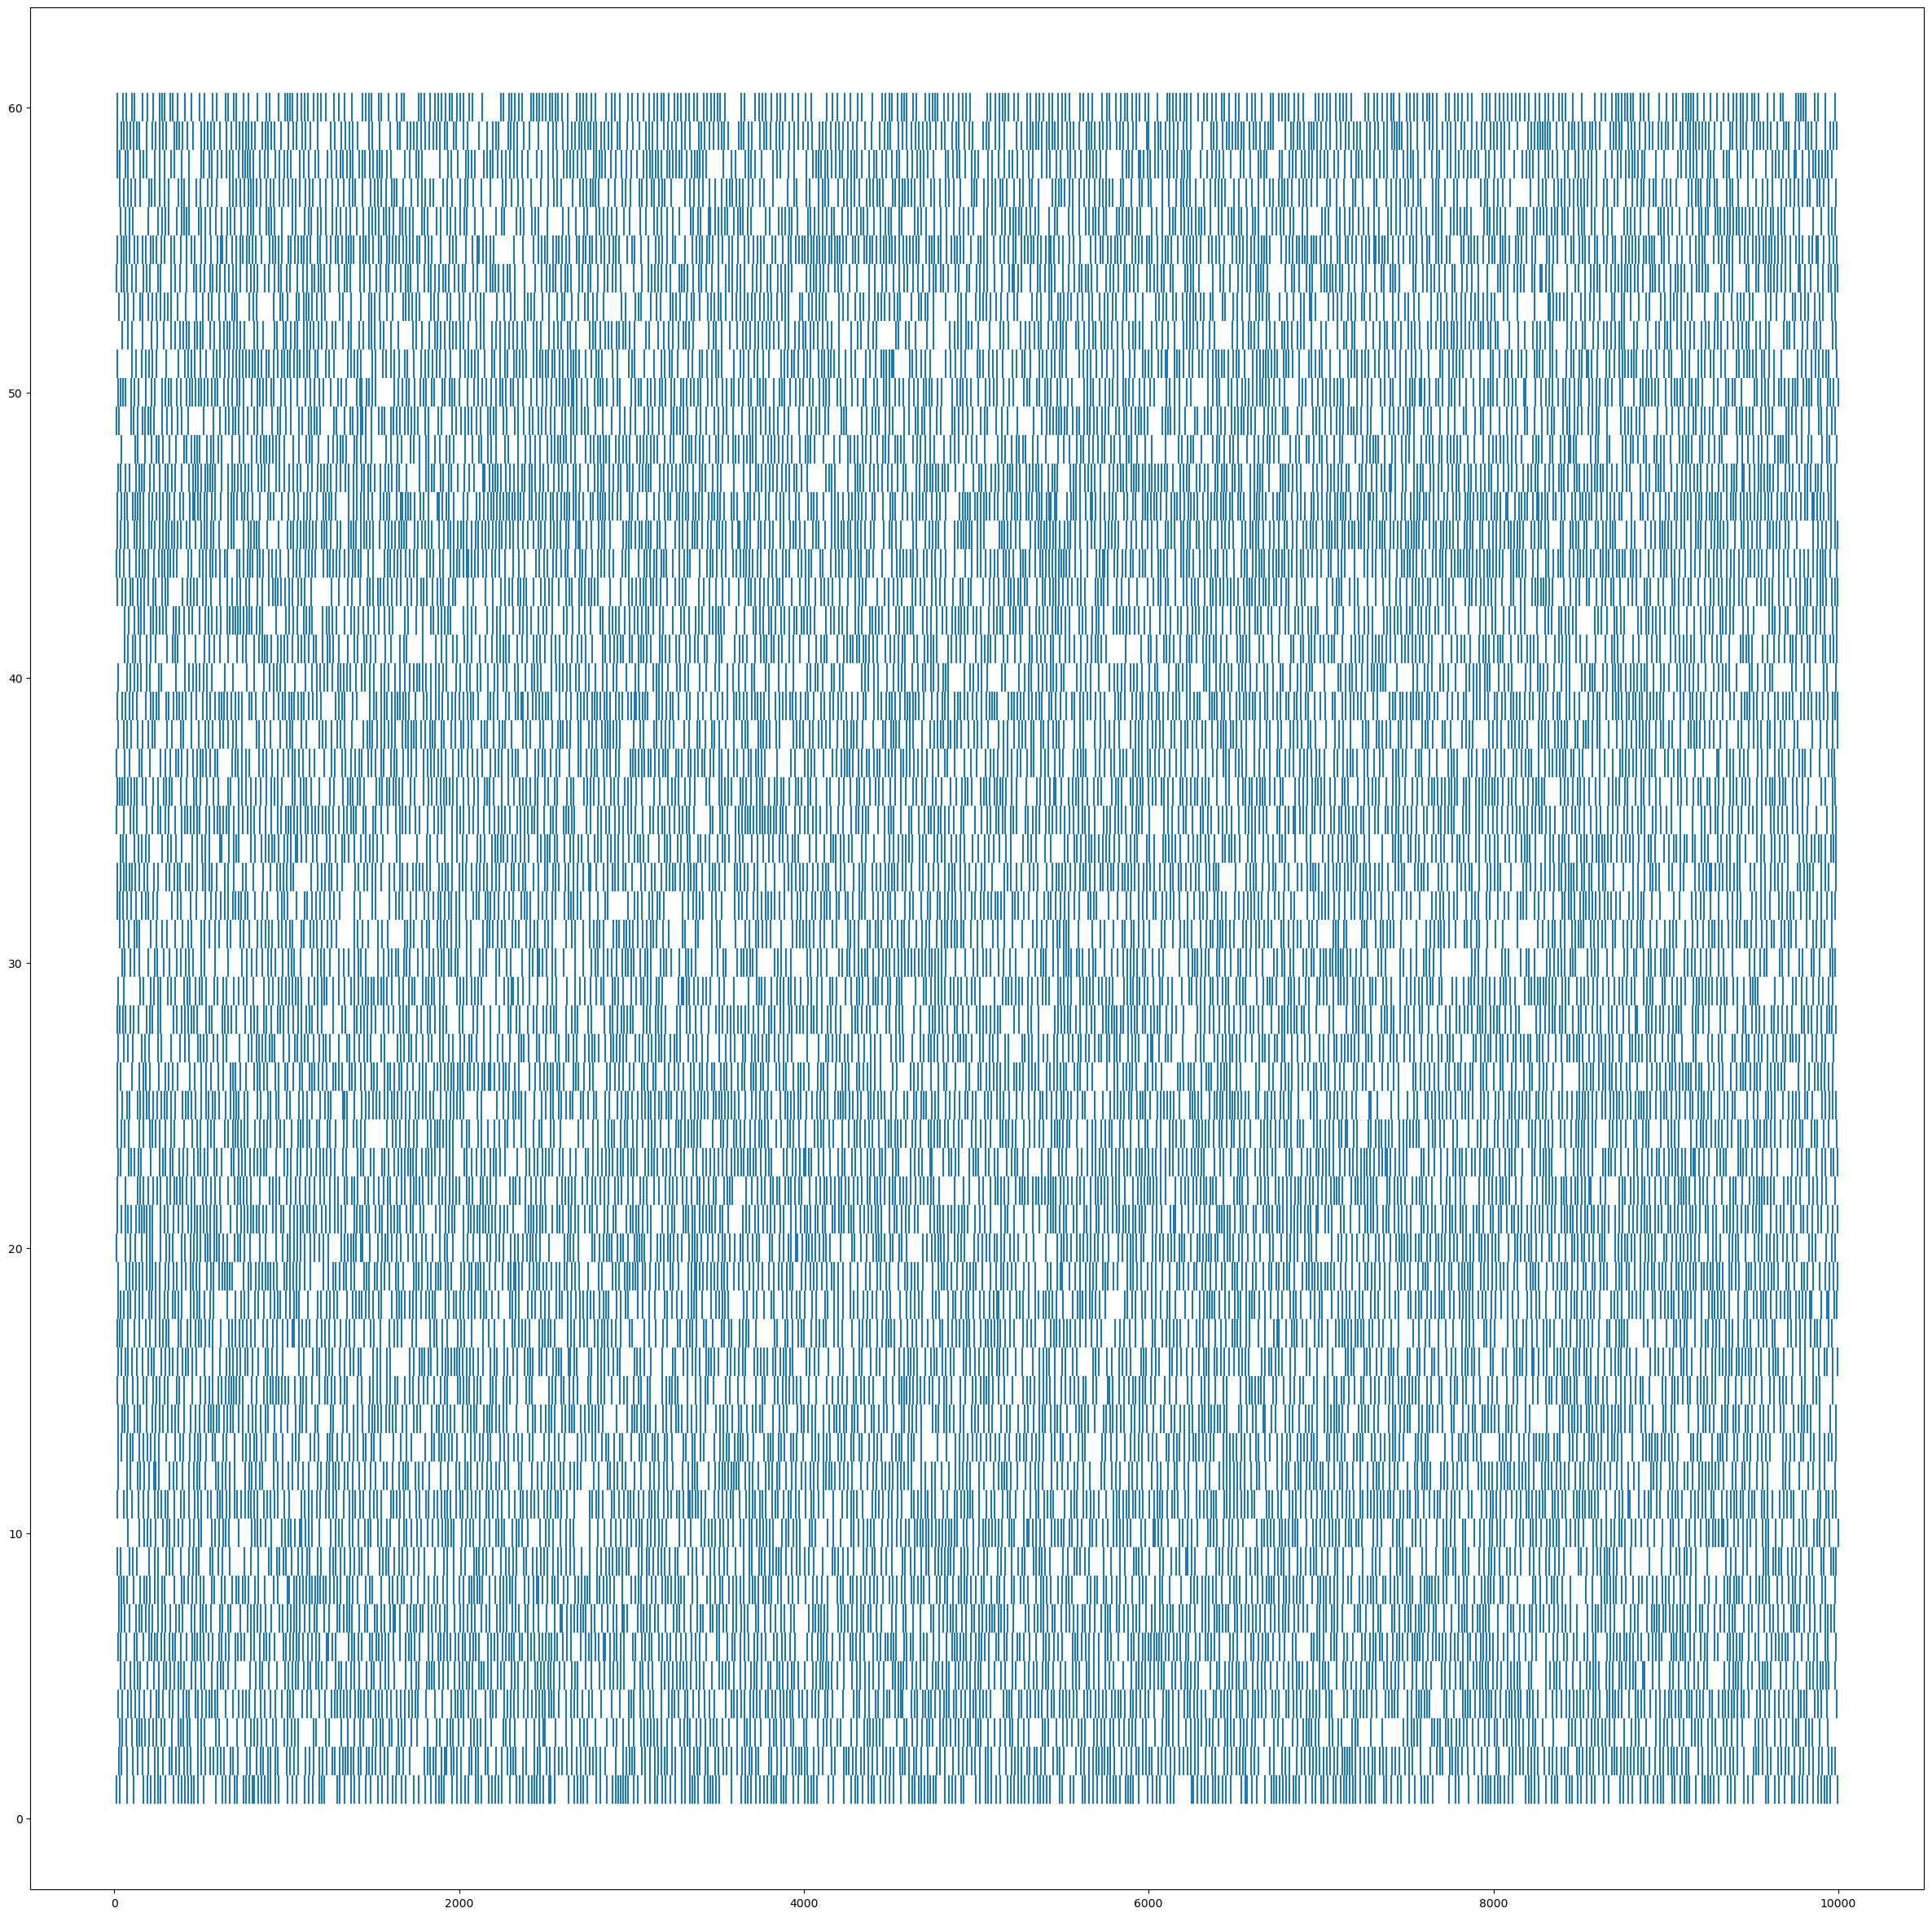

In [10]:
plt.figure(figsize=(30, 30))
for i in range(len(outdata['output'])):
    if len(outdata['output'][i]) > 0:
        plt.vlines(outdata['output'][i], i + 0.5, i + 1.5)
plt.show()

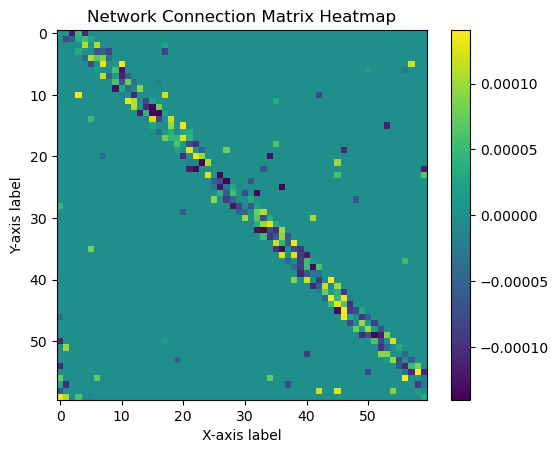

In [9]:
plt.imshow(outdata['matrix'], cmap='viridis', interpolation='nearest')
plt.colorbar()  
plt.title('Network Connection Matrix Heatmap')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.show()

In [25]:

outdata1 = get_info('FeedForward', 60, 5,5,get_index(2.6, 0.0, 0))

outdata2 = get_info('FeedForward', 60, 5,5,get_index(2.6, 0.4, 9))

FeedForward_point_layercount60_model5_input5_stddelay0.0_meandelay2.6_nrun0
FeedForward_point_layercount60_model5_input5_stddelay0.4_meandelay2.6_nrun9


In [26]:
cellidx = 223
len(outdata1['output'][cellidx])

162

In [29]:
get_vp(outdata1['output'][cellidx], outdata2['output'][cellidx], 0.1) 

0.7549999999995852

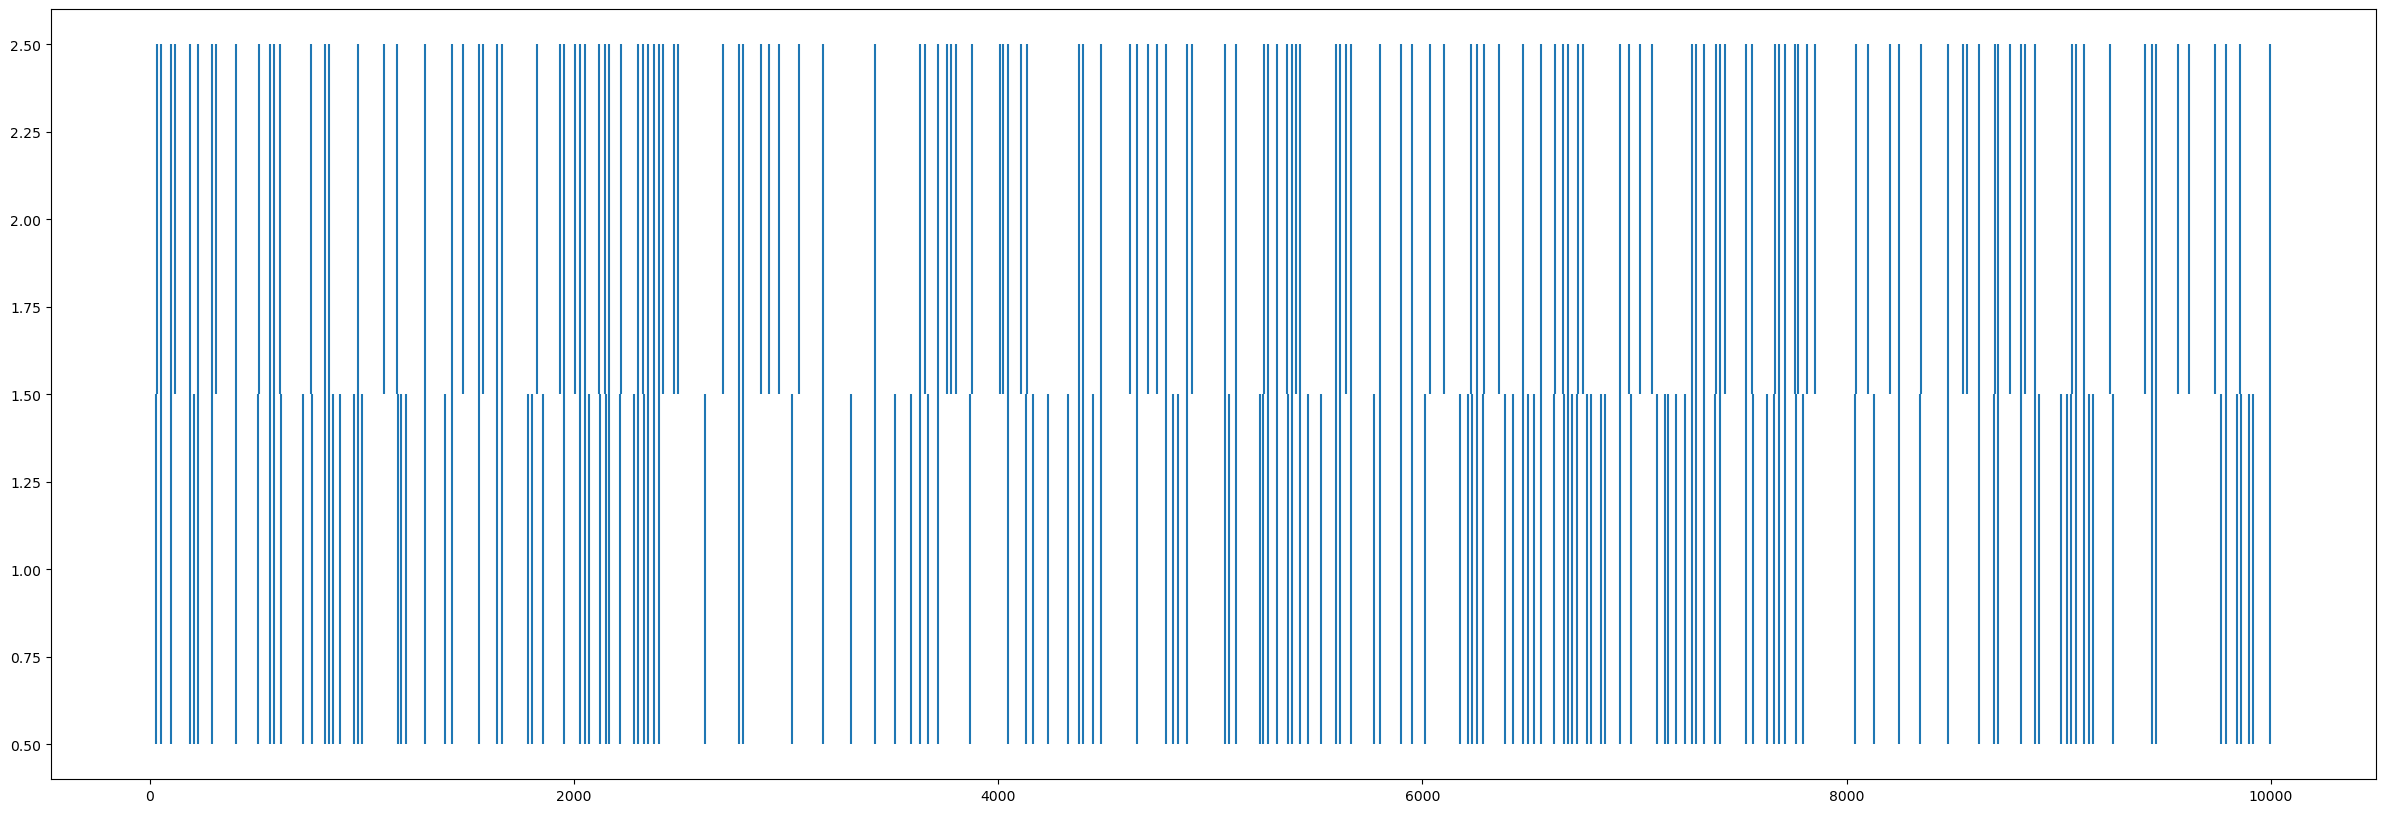

In [30]:
plt.figure(figsize=(30, 10))

plt.vlines(outdata1['output'][cellidx], 0 + 0.5, 0 + 1.5)
plt.vlines(outdata2['output'][cellidx], 1 + 0.5, 1 + 1.5)
plt.show()